# Assignment #3: Predicting Disease Progression Using Linear Regression

* Date: 16-06-2025
* Student name: Chaw Su Su Thinn
* Student ID: c0916347

## Objective

To understand and apply linear regression using Scikit-learn by analyzing the diabetes dataset. 
Students will explore data preprocessing, model training, evaluation, and interpretation of results.

## Background

The diabetes dataset is a classic dataset provided by Scikit-learn that includes medical information for diabetes patients. 
The goal is to predict disease progression one year after baseline measurements, using ten baseline variables.

## Dataset Features

Based on the **scikit-learn** documentations regarding **diabetes-dataset**

There are ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of 442 diabetes patients. 
The target is a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

* Number of Instances: 442

* Number of Attributes: First 10 columns are numeric predictive values

* Target: Column 11 is a quantitative measure of disease progression one year after baseline

* Attribute Information:

    * age in years

    * sex

    * bmi body mass index

    * bp average blood pressure

    * s1 tc, total serum cholesterol

    * s2 ldl, low-density lipoproteins

    * s3 hdl, high-density lipoproteins

    * s4 tch, total cholesterol / HDL

    * s5 ltg, possibly log of serum triglycerides level

    * s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1). 

(scikit-learn, 2022)

## Import Libraries

In [56]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

## Exploratory Data Analysis (EDA)

Load the diabetes dataset using Scikit-learn’s load_diabetes() function, or
import from diabetes.csv if using a CSV version.

In [31]:
# Load dataset from scikit-learn
diabetes347 = load_diabetes()

In [32]:
# Check target values
diabetes347.target[:3]

array([151.,  75., 141.])

In [33]:
# Check feature shapes
diabetes347.data.shape

(442, 10)

In [34]:
# Create dataframe for features
X = pd.DataFrame(diabetes347.data, columns=diabetes347.feature_names)

# Create target variable as series
y = pd.Series(diabetes347.target, name="target")

Display the first few rows and understand the data distribution

In [35]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [36]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [38]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [39]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [40]:
# Concatenate dataframe and target (series) to get full dataframe
df = pd.concat([X, y], axis=1)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


Visualize relationships between features and the target variable using
scatter plots or correlation heatmaps.

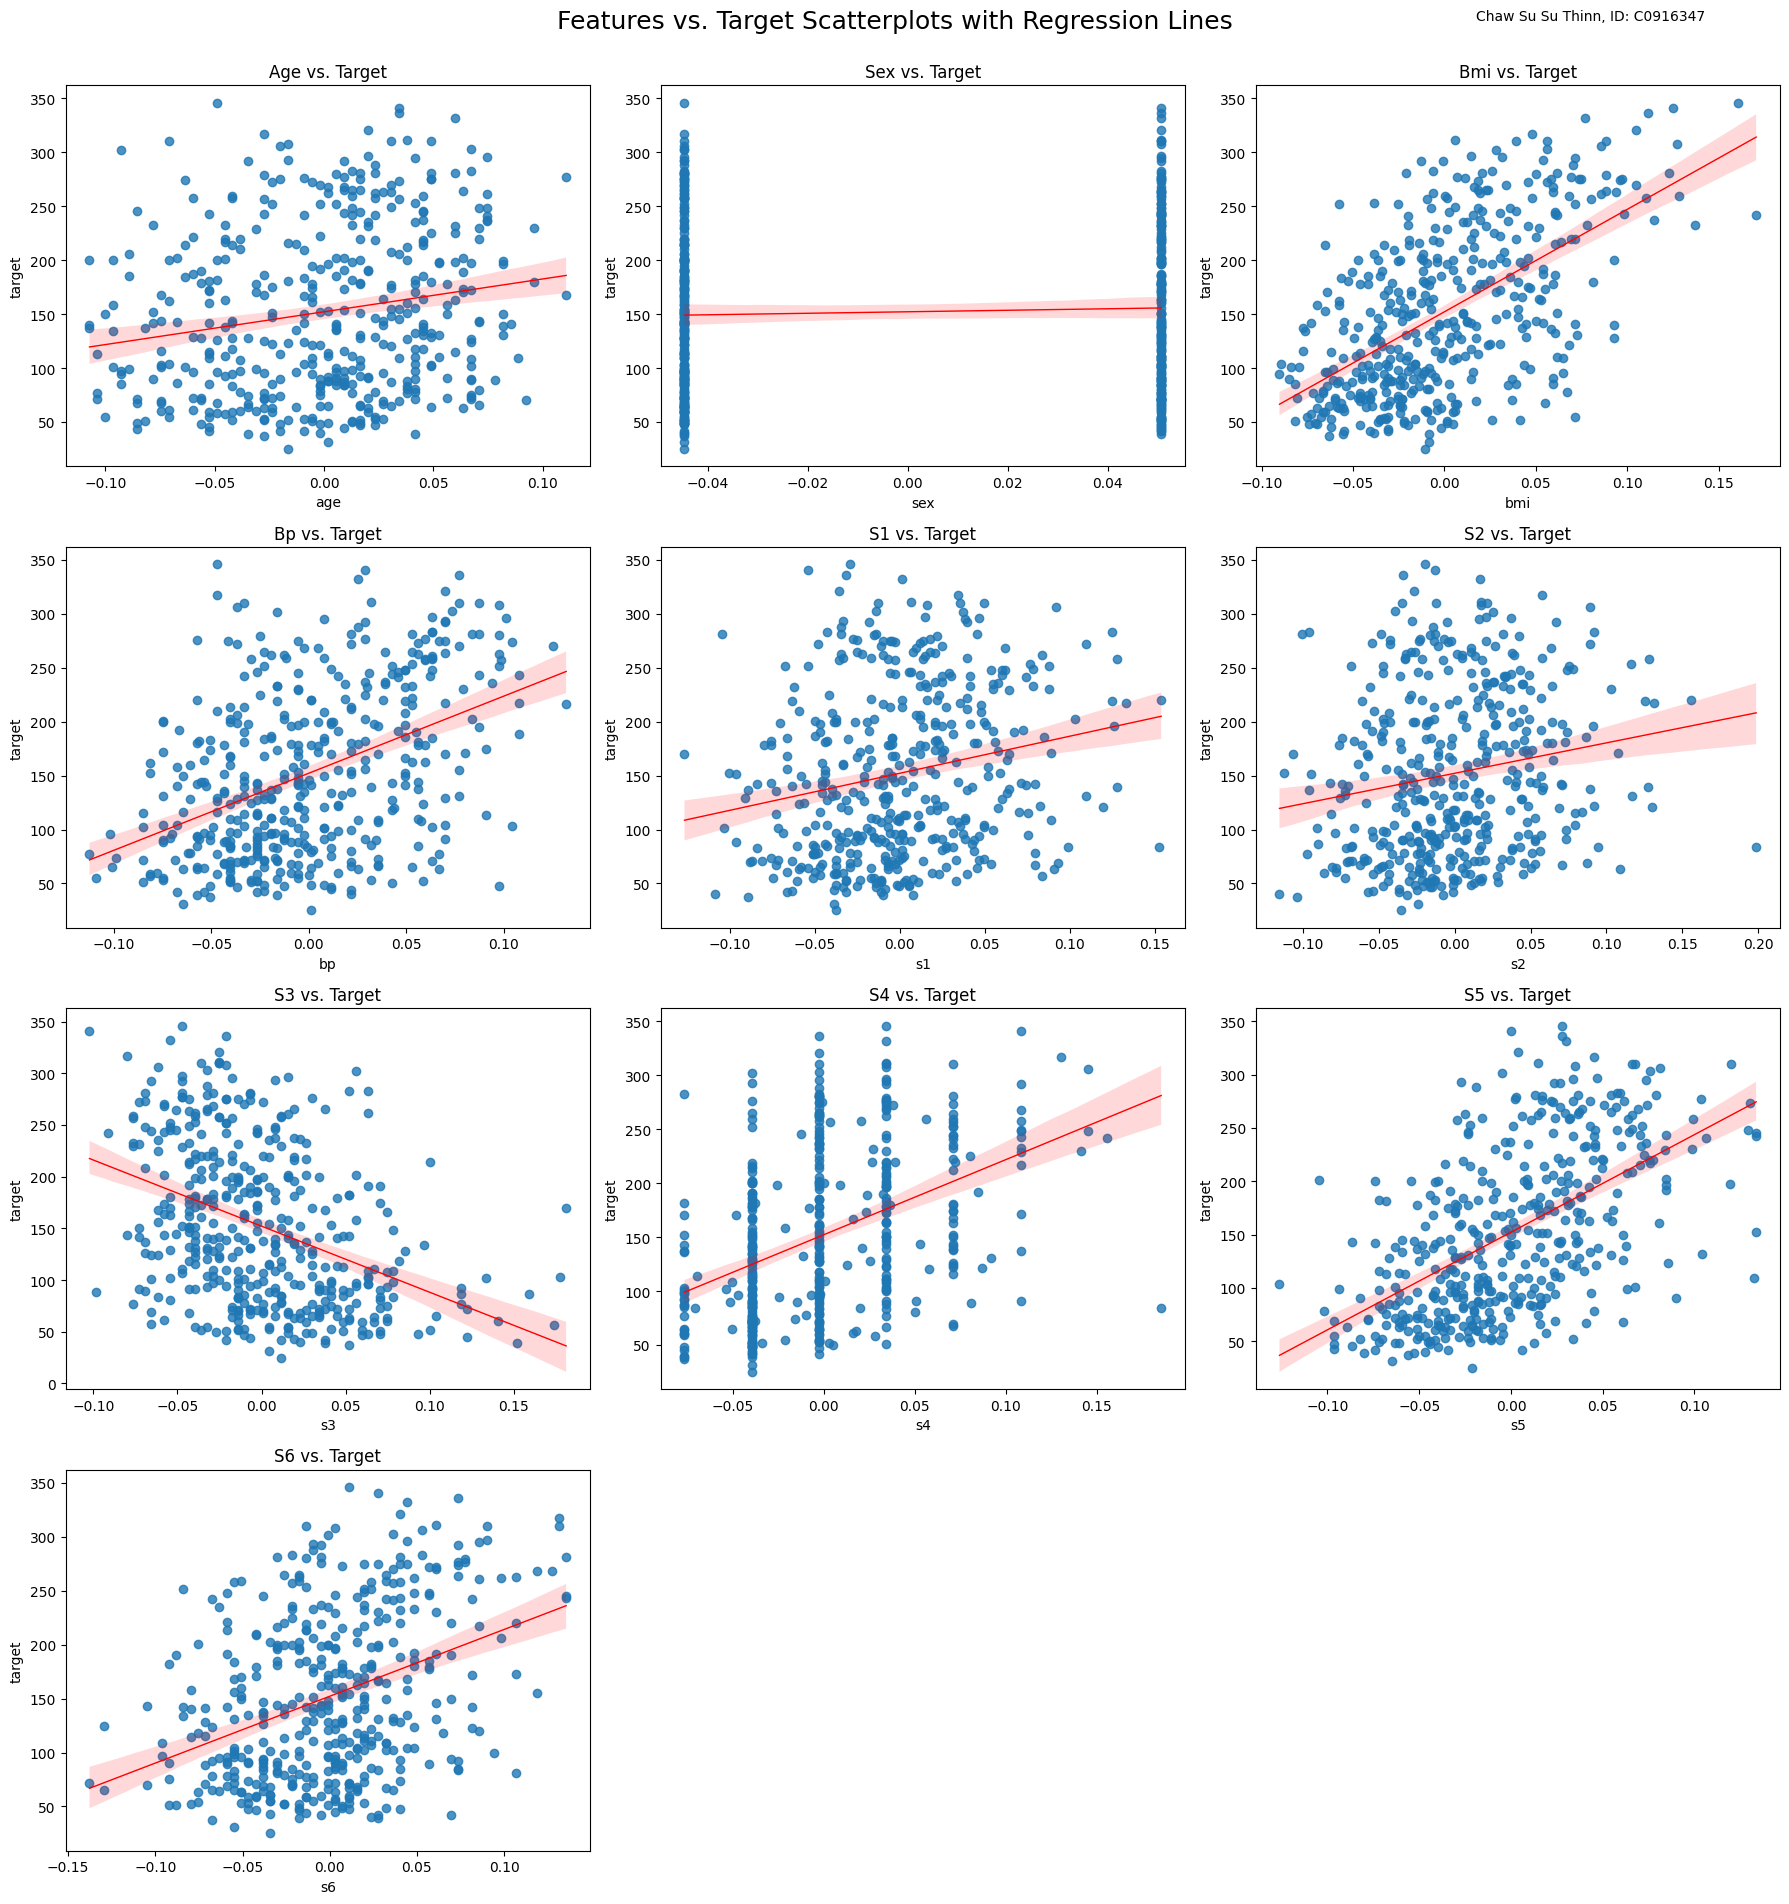

In [41]:
n_plts = len(X.columns) # number of plots
n_cols = 3 # number of cols per row
n_rows = (n_plts + n_cols - 1) // n_cols # total number of rows
width = 6*n_cols
height = 5*n_rows

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(width,height))
axes = axes.flatten()

# Set centered super title to the figure
fig.suptitle("Features vs. Target Scatterplots with Regression Lines", fontsize=18, y=0.95)

# Plot each feature vs target
for i, col in enumerate(X.columns):
    ax = axes[i]
    sns.regplot(x=X[col], y=y, ax=ax, line_kws={"color": "red", "lw": 1}) # Plot data and a linear regression model fit with confidence level
    ax.set_title(f"{col.title()} vs. Target") # Set title for each subplot
    ax.set_xlabel(col) # Set x-axis label
    ax.set_ylabel(y.name) # Set y-axis label

# Remove empty subplots
for j in range(n_plts, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.95, 0.95, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Analysis from Feature vs. Target Scatterplots**

The scatterplots above show the relationship between each normalized input feature and the target variable `diabetes_progression`, which is a quantitative measure of diabetes progression after one year. 

Each plot includes a linear regression line with a confidence interval, so that the viewer can visualize potential correlations clearly.

**Key Insights from the Scatterplots**

* There are 8 features which has **positive correlations** with target variable. These include `age`, `bmi`, `bp`, `s1`, `s2`, `s4`, `s5`, and `s6`. 
As the value of these features increases, the predicted diabetes progression tends to increase as well. The trend is especially steep for `bmi`, `bp` and `s5`.

* Meanwhile, there is 1 feature that has **negative correlation** with target. That is `s3` which describes **hdl, high-density lipoproteins level** based on the scikit-learn documentations. This means higher values of `s3` are associated with lower diabetes progression scores. According to the U.S. National Library of Medicine’s MedlinePlus, HDL is considered good cholesterol because higher HDL levels can lower the risk for coronary artery disease and stroke. (Medline Plus, 2019)

* Furthermore, the `sex` variable only takes on **two distinct values**, reflecting its binary nature (likely male/female, though anonymized). As a result, the scatterplot appears as two vertical bands, and the regression line is flat. This implies that there is little to no linear relationship between `sex` and the target.

Next, I am going to plot correlation matrix to confirm these correlations, and whether or not there are multicolineary issues within features.

In [42]:
# Compute pairwise correlation of columns
corr = df.corr()

# Sort and view feature correlations with target
corr_target = corr["target"].sort_values(ascending=False)
print(corr_target)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


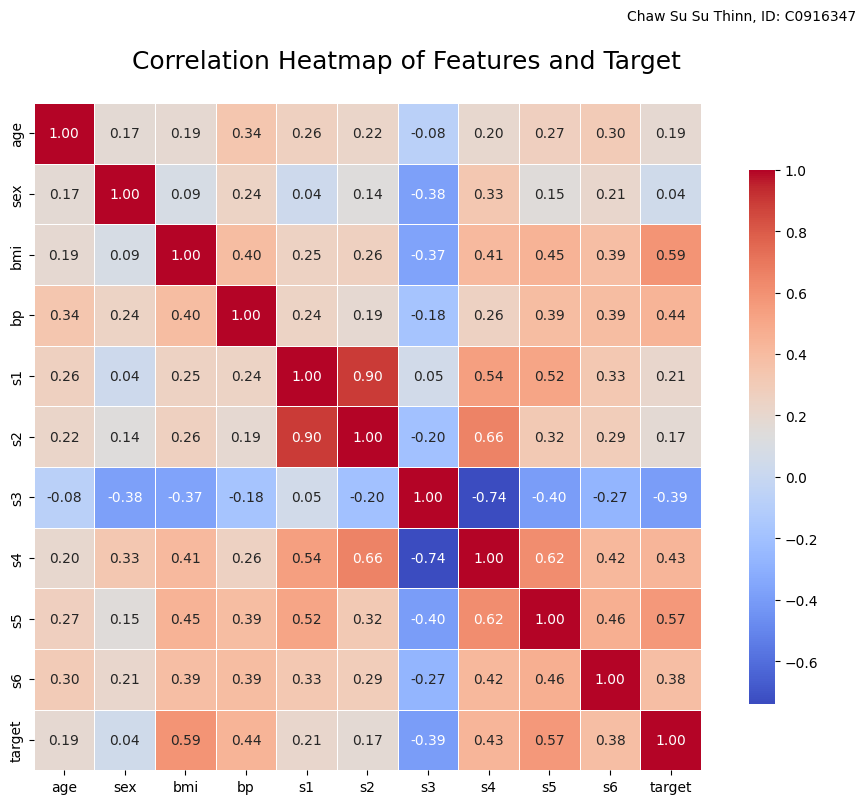

In [43]:
# Create the heatmap figure
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True, # show correlation values
    fmt=".2f", # format to 2 decimal places
    cmap="coolwarm", # set color gradient
    square=True, # square cells
    linewidths=0.5, # line between cells
    cbar_kws={"shrink": 0.8} # set colorbar size
)

# Set centered super title to the figure
fig.suptitle("Correlation Heatmap of Features and Target", fontsize=18, y=0.95)

fig.text(0.95,1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Analysis of Correlation Matrix**

The heatmap shows how each feature in the dataset correlates with the target variable (diabetes progression), as well as how the features relate to each other.

**Key Insights from the Correlation Heatmap**

* Among all features, `bmi` has the **strongest positive correlation** with the target (0.59), followed closely by `s5` (0.57). These two variables are likely to be the most predictive in a linear model.

* Meanwhile, there are `bp`, `s4` and `s6` has **moderate positive correlation** with the target, with Pearson correlation coefficients of 0.44, 0.43, 0.38 respectively. These features might contribute meaningfully to the model but are less influential than `bmi` and `s5`.

* Lastly, `sex` has the **weakest correlation** (0.04). There is little to no linear relationship between `sex` and the target in this dataset. 

* On the other hand, `s3`is **negatively correlated** with the target (-0.39), which means higher values of S3 are associated with lower diabetes progression, as I observed earlier during scatterplot analysis.

* There is also evidence of **multicollinearity** among some features. The strongest case is between `s1` and `s2`, with a correlation of 0.90. Other **moderately high correlations** include `s2` and `s4` (0.66), `s4` and `s5` (0.62), and `s5` and `s1` (0.52).

* Since `s1` and `s2` are highly correlated (correlation coefficient of 0.90), I’ve decided to drop one of them. This helps avoid potential issues with unstable or inflated coefficients in the linear regression model which I will be building at later phase.

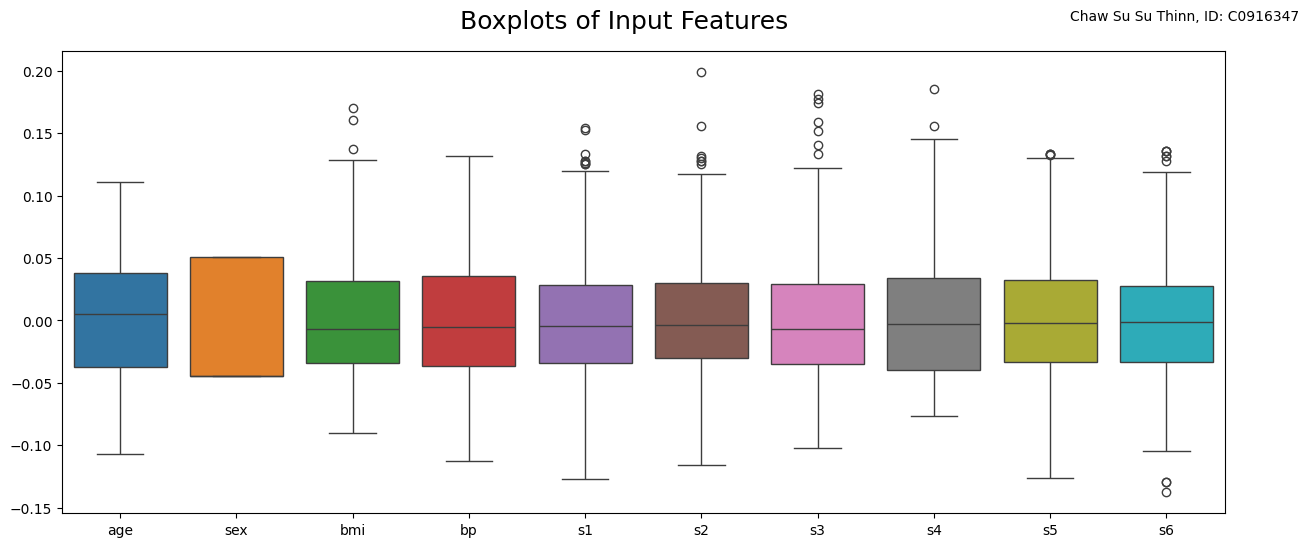

In [44]:
fig = plt.figure(figsize=(15, 6)) 
sns.boxplot(data=df.drop(columns='target'))
fig.suptitle("Boxplots of Input Features", fontsize=18, y=0.95)
fig.text(0.95,0.95, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt.show()

**Analysis of Feature Distribution**

This boxplot provides a visual summary of the distribution of each feature in the diabetes dataset. 

**Key Insights from the Boxplot**

* All features are centered around 0. 
   * This is expected because the dataset is mean-centered (mean ≈ 0) according to the scikit-learn documentation. 
   * Most features also have similar spread, since all of them are scaled by standard deviation.

* Outliers are present in multiple features. 
   * I can see the dots above and below the "whiskers" of some boxplots. These represent outliers. 
   * Features like `bmi`, `s1`, `s2`, `s3`, `s4`, `s5`, and `s6` show multiple upper-end outliers.
   * `s6` show outliers on the lower end.

* Spread of values (IQR) is consistent.
   * The box (interquartile range) for most features is symmetric and narrow, showing relatively uniform distributions.
   * No extreme skewness is obvious, although `sex` is more compressed — which makes sense since it’s binary, with 2 distinct values, and are scaled.

* Overall, the boxplot confirms that the dataset has been scaled and that no single feature dominates in variance.

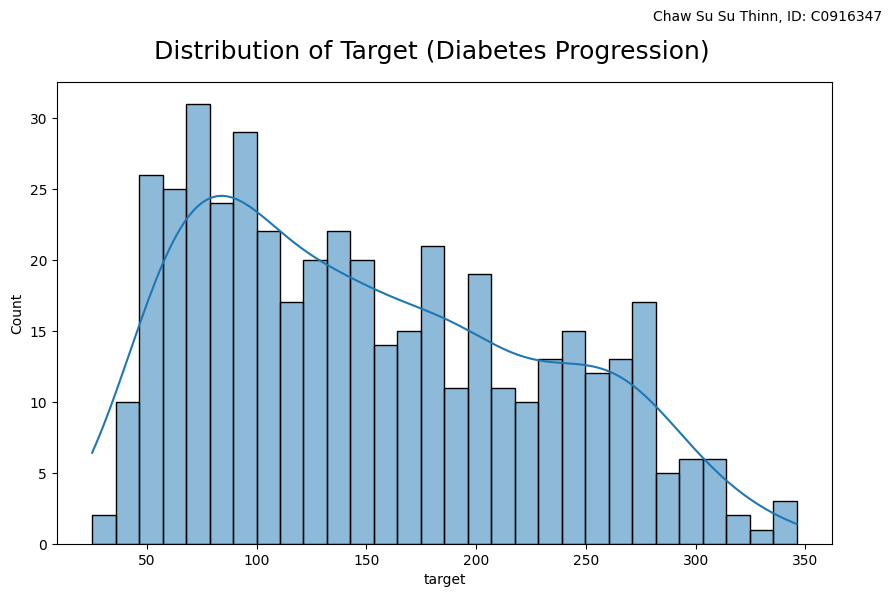

In [45]:
fig = plt.figure(figsize=(10, 6)) 
sns.histplot(df['target'], bins=30, kde=True)
fig.suptitle("Distribution of Target (Diabetes Progression)", fontsize=18, y=0.95)
fig.text(0.95,1, "Chaw Su Su Thinn, ID: C0916347", ha='right', va='top', fontsize=10)
plt.show()

**Analysis of Target Distribution**

This histogram shows the distribution of the target variable: diabetes progression score, wich is the quantitative measure of disease progression one year after baseline.

**Key Insights from Histogram**

* The distribution of the target variable is **right-skewed**. There are more patients with lower progression scores.

* The majority of patients have scores between **50 and 100**. These bins contain the highest frequencies.

* The distribution has more **granularity** with 30 bins. This reveals smaller fluctuations and variation in the data.

* A **smooth curve (KDE)** is plotted on top. It shows a sharp rise in low scores, then a gradual decline.

* The overall shape does not show **normal distribution**. The long tail on the right shows that some patients have much higher progression scores.

## Data Preprocessing

### Normalize or standardize the features if necessary


In [46]:
# Verify the statistics summary of input features
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [47]:
# Verify the statistics summary of target
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

**Analysis**

* The features are already prepossed. 
    * Features are mean-centered.
    * Each column has been scaled so that the sum of squares is 1. 
* So, I will not do any additional standardization for the features.

* For the target, although it is right-skewed, I will not apply any transformation. Standard linear regression does not require the target to be normally distributed. The model will still optimize the best-fitting line using least squares.

* If the features were not standardized, I would use `StandardScaler()` from `sklearn.preprocessing` to scale them before training. This helps linear models perform better and ensures features are on the same scale.

* Normalization is typically used when working with distance-based algorithms like KNN or cosine similarity, where the magnitude of the feature vectors can bias the results. Since I'm using **linear regression** and the data is already standardized, normalization is not required here.

* If I were to use normalization, I would apply `Normalizer()` to make sure that each sample (row) have unit length. This is helpful in models where the direction of the data matters more than the magnitude, such as KNN or cosine similarity-based algorithms.

### Drop highly correlated input feature

* Since both `s1` and `s2` are highly correlated to each other, I will drop one of them to avoid multicollinearity issue. 

In [48]:
X = X.drop(columns=['s2'])
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's3', 's4', 's5', 's6'], dtype='object')

### Check for missing values and handle them appropriately


In [49]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [50]:
y.isna().sum()

np.int64(0)

**Analysis:**

* There are no missing values inside the dataframe when I checked using `isna().sum()`, so I don't need to handle them.

* If there were missing values, I would use either `dropna()` to remove them or `fillna()` to fill them.

### Split the dataset into training and testing sets (e.g., 80/20 split)

In [54]:
# Verfiy the shape before split
print(X.shape)
print(y.shape)

(442, 9)
(442,)


In [ ]:
# Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verify the shapes again
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 9) (353,)
(89, 9) (89,)


**Analysis**

* To evaluate the model's performance properly, I split the dataset into two parts:

    * Training set: 80% of the data

    * Testing set: 20% of the data

* This allows the model to learn patterns from the training data and then be evaluated on unseen data (the test set).

* I used `train_test_split()` from `sklearn.model_selection`, with `random_state=42` to ensure reproducibility.

* After splitting, I used `.shape` to verify the splits. 
    
    * X_train now has 353 rows.
    * X_test now has 89 rows.
    * Column size is still the same 9 columns.
    * For target y, y_train now has 353 rows, and y_test now has 89 rows.

* If I were to use a validation set (e.g. for hyperparameter tuning or model selection), I would split the training set again, using a smaller portion (e.g. 10–20%) as a validation set.

    * But since the dataset size for diabetes is relatively small (only 442 samples), further splitting would reduce the amount of training data available.

    * In such cases, it's often better to use cross-validation instead of holding out a separate validation set.

* Overall, since linear regression doesn’t involve hyperparameter tuning, I don’t need a separate validation set. However, because the dataset is small, I will use **cross-validation** to better estimate how well the model generalizes.

## Model Building

### Use LinearRegression from Scikit-learn to train the model

In [ ]:
# Instantiate LinearRegression
lr = LinearRegression()

### Fit the model on the training data

In [ ]:
# Train the model on the training set
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
print("Intercept:", lr.intercept_)


coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

print(coef_df)

Intercept: 151.3010031750481
  Feature  Coefficient
0     age    43.181123
1     sex  -241.376201
2     bmi   555.709752
3      bp   344.647390
4      s1  -316.745217
5      s3   -81.325629
6      s4   241.183507
7      s5   492.772265
8      s6    53.002574


**Analysis**

* For model building, I imported `LinearRegression` from `sklearn.linear_model`.

* After that, I instantiated the model using `lr = LinearRegression()`. This creates a basic linear regression model with default settings (e.g., no regularization).

* After instantiation, I trained the model using `lr.fit(X_train, y_train)`. This step fits the model to the training data by learning the optimal coefficients (weights) and intercept that minimize the residual sum of squares between the actual and predicted values.

* After fitting, I printed the learned model parameters. 

    * First, I printed `lr.intercept_`, which is the bias term (constant) in the linear regression equation.

* To better understand the impact of each feature on the target variable, I created a DataFrame called `coef_df` that maps each feature to its corresponding learned `coefficient`. 
    * This output shows the estimated weight (slope) that the linear regression model assigned to each feature. 
    * Positive values in `coef_df` indicate a positive influence on diabetes progression, while negative values indicate a negative influence.



## Model Evaluation

### Predict values on the test set

In [ ]:
# Set 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Negative MSE is the default scoring — so we take the negative to flip it
scores = cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert to positive MSE, then average
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print("Cross-validated RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

### Evaluate performance using:

* Mean Squared Error (MSE)
* Sagara Samarawickrama 2025S
* Root Mean Squared Error (RMSE)
* R-squared (R²) score

### Plot the predicted vs actual values

## Model Interpretation

### Print out model coefficients and intercept

### Discuss which features have the most significant impact on diabetes progression

### Reflect on any assumptions of linear regression and whether they seem to be satisfied

## Report / Presentation

### Provide a summary of findings, including:

Which variables were most predictive

Overall model performance

Insights from the visualization